<div style="text-align: center;">
    <h1>Graduate Admission probability predictor</h2>
</div>

### <u> Problem Statement</u> :

The Client has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.


How can you help here?

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.


## 1. Importing the dataset

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

In [3]:
# Importing dataset
df = pd.read_csv(r"D:\\ML\\Linear_regression\\education_admission.csv")

# Creating backup
df_backup = df.copy

In [4]:
# Viewing the data
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## 2. Data Understanding

#### <u>Column Descriptors</u> :

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)
0 to 1)

In [5]:
# Viewing the shape of the data
print("Shape : \nNo of rows   : " , df.shape[0], "\nNo of columns: ", df.shape[1])
print()

Shape : 
No of rows   :  500 
No of columns:  9



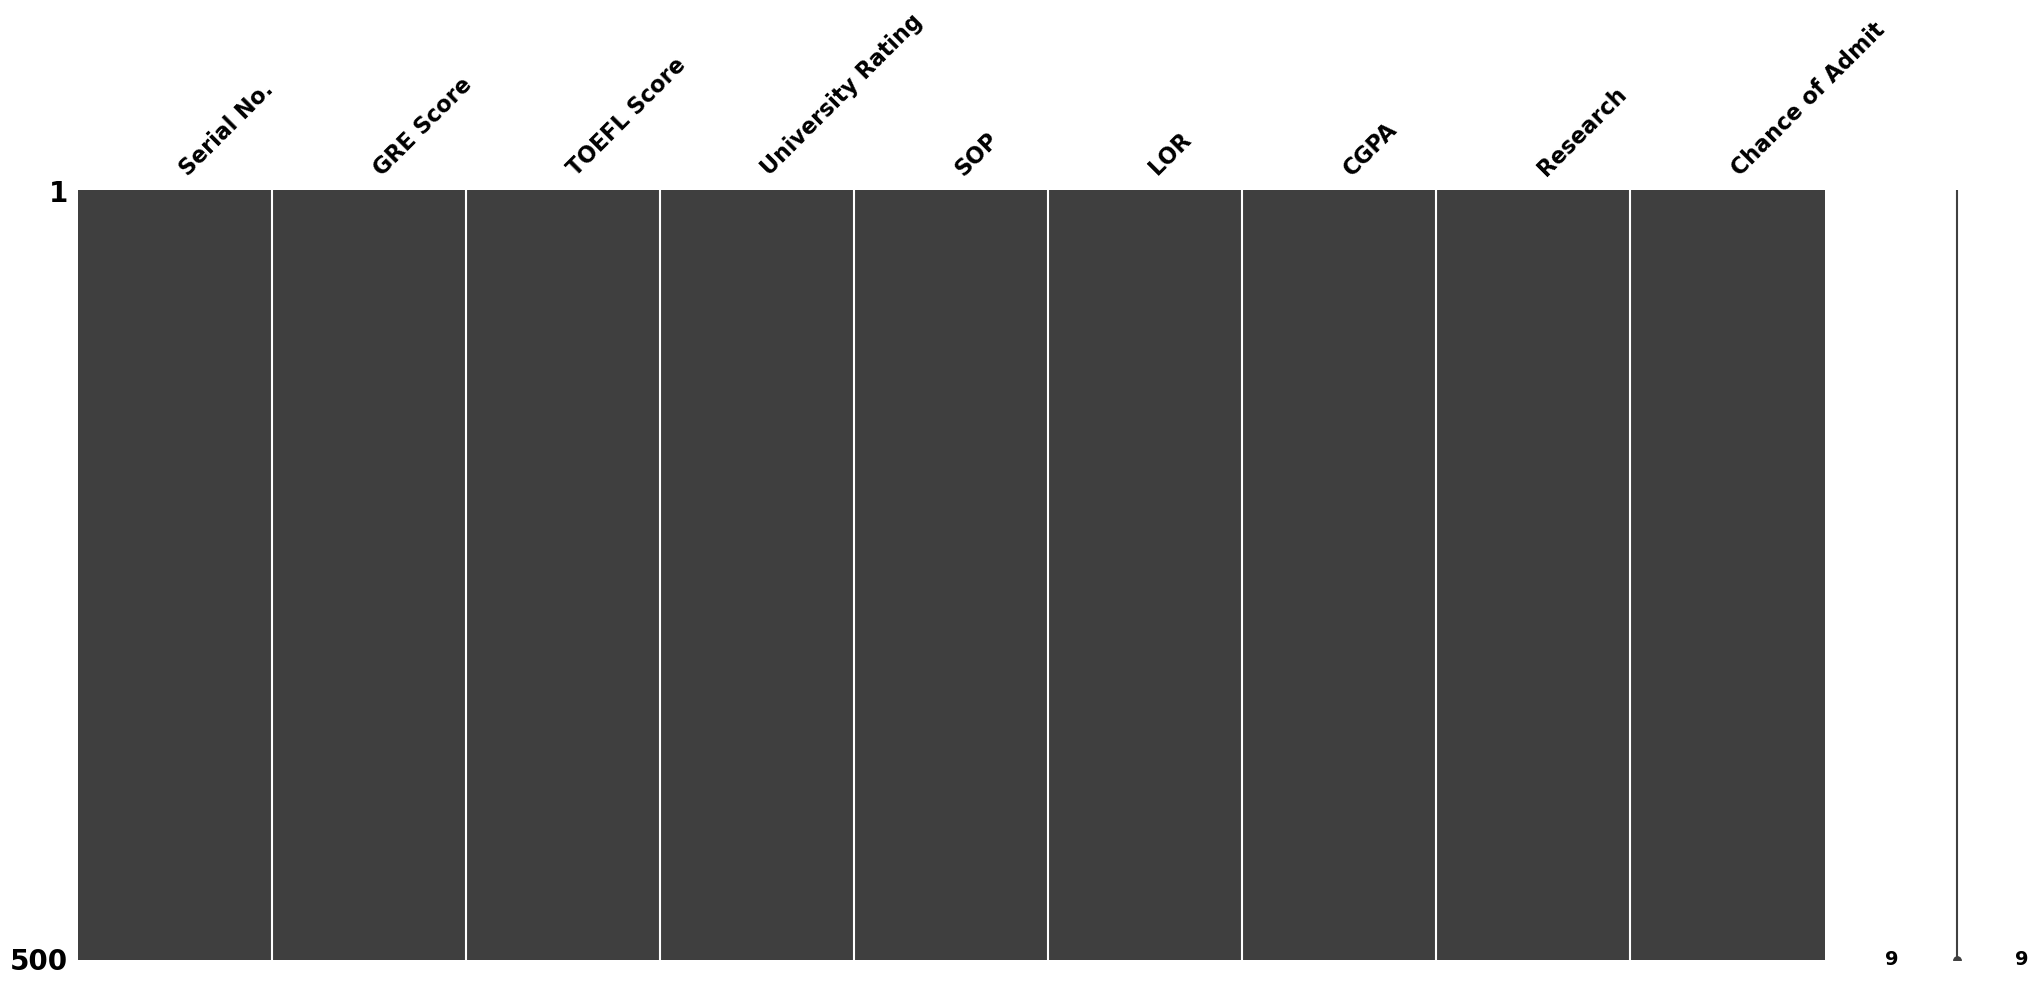

In [6]:
# Visualizing the missing values
msno.matrix(df)
plt.show()

In [7]:
# Viewing the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


<br>
About the data set:
After taking a look at the data we could see this is a small dataset with no missing values which is quite clean and all the data are in numeric terms, so, we could proceed with further observations

In [8]:
# Let us rename the columns with spaces, it might be hard to work with
df = df.rename(columns = {'Serial No.' : 'SNo', 'GRE Score' : "GRE", 'TOEFL Score': 'TOEFL', 'University Rating' : 'Univ_Rating',\
                          'Chance of Admit ' : 'COA'})

# Verify 
df.columns

Index(['SNo', 'GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'COA'],
      dtype='object')

In [113]:
# Let us drop SNo since it won't be useful further
df.drop('SNo', inplace = True, axis = 1)

# Verify 
df.head()

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,COA
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## 3. Exploratory Data Analysis (EDA)

### 3.1. Univariate Analysis

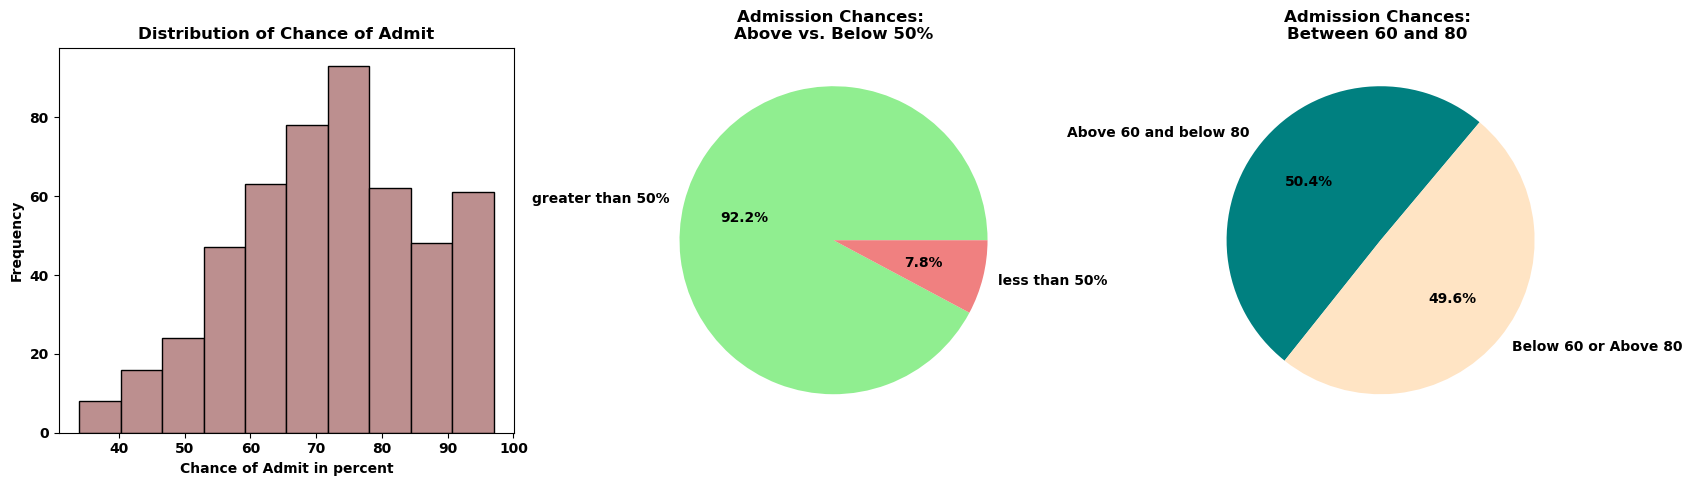

In [122]:
#  1. Chance of Admit - Target Variable

plt.figure(figsize = (20,5))

# Distribution of Chance of Admit
plt.subplot(131)
(df.COA*100).plot.hist(edgecolor = 'black', color = 'rosybrown')
plt.title('Distribution of Chance of Admit')
plt.xlabel('Chance of Admit in percent')

# Admission Chances:Above vs. Below 50%
plt.subplot(132)
(df.COA>0.5).value_counts().plot.pie(labels =['greater than 50%', 'less than 50%'], colors = ['lightgreen', 'lightcoral'], autopct='%1.1f%%')
plt.title('Admission Chances: \nAbove vs. Below 50%')
plt.ylabel(None)

# Admission Chances: Between 60 and 80
plt.subplot(133)
((df.COA>0.60) & (df.COA<0.80)).value_counts().plot.pie(labels =['Above 60 and below 80', 'Below 60 or Above 80'], \
                                                        colors = ['teal', 'bisque'], startangle = 50, autopct = '%1.1f%%')
plt.title('Admission Chances: \nBetween 60 and 80 ')
plt.ylabel(None)
plt.show()

- **Concentration Between 60% and 80%:** Nearly half of the population (around 50%) has an admission chance between 60% and 80%, indicating that a significant portion falls within this moderate-to-high probability range.

- **High Overall Admission Rate (Above 50%):** If individuals with a chance above 50% are considered for admission, over 92% of the population would qualify, suggesting a strong likelihood of acceptance for most candidates.

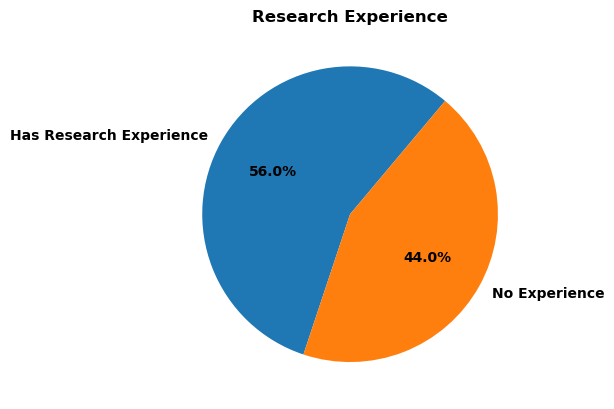

In [127]:
# 2. Research
plt.pie(df.Research.value_counts(), startangle = 50, autopct = '%1.1f%%', labels = ('Has Research Experience' , 'No Experience'))
plt.title('Research Experience')
plt.show()

<Axes: ylabel='Frequency'>

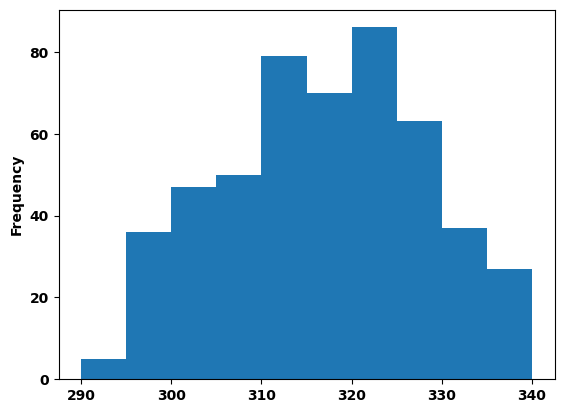

In [128]:
col = ['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR ', 'CGPA']


plt.subplot()


df.GRE.plot.hist()

Index(['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'COA'],
      dtype='object')